## 과제(7/6)
아래 가이드에 따라서 고객 고객별 연간 구매데이터를 생성하고 아래사항을 수행하세요(관측치 10000개)

거래 번호
- id : 1 ~ 10000번 일련번호 - 개시 후 1만 건의 거래가 있었고 걍 거기에 넘버링한 거라고 이해해보자

고객별 속성 데이터
- cusno : 고객번호 10000개 랜덤
- gender : 0,1 정수 난수 생성
- age : 0 ~ 80사이 정수 난수 생성
- region : 1 ~ 10 사이 정수 난수 생성

거래 데이터
- day : 요일
- date : 2020-01-01 ~ 2021-12-31 사이의 날짜 10000개 생성

- product_20 : 고가제품(10), 중가제품(20), 저가제품(30)로 구분제품코드 10,20,30
- product_21 : 고가제품(10), 중가제품(20), 저가제품(30)로 구분제품코드 10,20,30
- price_20 : 1000 ~ 50000 사이 실수 난수 생성 (20년도)
- price_21 : 1000 ~ 50000 사이 실수 난수 생성 (21년도)
- quantity_20 : 1 ~ 100 사이 정수 난수 생성
- quantity_21 : 1 ~ 100 사이 정수 난수 생성

- time_20 : 01 ~ 24 사이 정수 난수 생성
- time_21 : 01 ~ 24 사이 정수 난수 생성

- amount_20 : price_20 * quantity_20
- amount_21 : price_21 * quantity_21
- sales : 20년 대비 21년구매금액이 증가면 1, 감소면 0

Q1. 고객 속성(id, 성별, 연령, 거주지역) 데이터와 거래 데이터를 통합한 데이터 프레임 df를 생성하세요.

In [1]:
import numpy as np
import pandas as pd
ar = np.random.rand(10000,4)
df1 = pd.DataFrame(ar, columns = ['id','gender','age','region'] )
ar2 = np.random.rand(10000,6)
df2 = pd.DataFrame(ar2, columns = ['product_20','product_21','price_20','price_21','quantity_20','quantity_21'])
df2.head()

,product_20,product_21,price_20,price_21,quantity_20,quantity_21
0,0.411912,0.750220,0.461916,0.887055,0.969362,0.853226
1,0.201720,0.642208,0.486903,0.164632,0.466598,0.641350
2,0.966909,0.435305,0.022433,0.393750,0.396821,0.684691
3,0.178316,0.810395,0.401784,0.098597,0.229794,0.922876
4,0.028968,0.554554,0.067792,0.138925,0.972621,0.866548


In [2]:
# df1['id']=np.random.randint(1,1001,1000)
df1['id'] = np.arange(1,10001)
df1['gender']=np.random.randint(0,2,10000)
df1['age']=np.random.randint(0,81,10000)
df1['region']=np.random.randint(1,11,10000)
df1['cusno']=np.arange(10001,20001)
#li = list(range(1,1001))
#df1['cusno']= random.sample(li,1000)

df1.head()

,id,gender,age,region,cusno
0,1,1,23,7,10001
1,2,1,79,7,10002
2,3,1,54,9,10003
3,4,1,30,8,10004
4,5,1,33,3,10005


In [3]:
df2['product_20']=np.random.choice([10,20,30],10000)
df2['product_21']=np.random.choice([10,20,30],10000)
df2['price_20']=np.random.uniform(1000,50001,10000)
df2['price_21']=np.random.uniform(1000,50001,10000)
df2['quantity_20']=np.random.randint(1,101,10000)
df2['quantity_21']=np.random.randint(1,101,10000)
df2.head()

,product_20,product_21,price_20,price_21,quantity_20,quantity_21
0,30,10,46843.380473,11072.780324,55,72
1,30,30,35554.024485,25449.291438,53,9
2,10,30,8589.205771,22491.562297,25,66
3,30,10,48337.363668,28024.851103,48,61
4,30,20,20477.994858,38183.047763,71,21


In [4]:
df = df1.join(df2,how='outer')
#df.set_index('id',inplace=True)
df.head()

,id,gender,age,region,cusno,product_20,product_21,price_20,price_21,quantity_20,quantity_21
0,1,1,23,7,10001,30,10,46843.380473,11072.780324,55,72
1,2,1,79,7,10002,30,30,35554.024485,25449.291438,53,9
2,3,1,54,9,10003,10,30,8589.205771,22491.562297,25,66
3,4,1,30,8,10004,30,10,48337.363668,28024.851103,48,61
4,5,1,33,3,10005,30,20,20477.994858,38183.047763,71,21


In [5]:
df['price_20']= round(df['price_20'],2)
df['price_21']= round(df['price_21'],2)
df.head()

,id,gender,age,region,cusno,product_20,product_21,price_20,price_21,quantity_20,quantity_21
0,1,1,23,7,10001,30,10,46843.38,11072.78,55,72
1,2,1,79,7,10002,30,30,35554.02,25449.29,53,9
2,3,1,54,9,10003,10,30,8589.21,22491.56,25,66
3,4,1,30,8,10004,30,10,48337.36,28024.85,48,61
4,5,1,33,3,10005,30,20,20477.99,38183.05,71,21


In [6]:
df['amount_20']=df['price_20']*df['quantity_20']
df['amount_21']=df['price_21']*df['quantity_21']
df.head()

,id,gender,age,region,cusno,product_20,product_21,price_20,price_21,quantity_20,quantity_21,amount_20,amount_21
0,1,1,23,7,10001,30,10,46843.38,11072.78,55,72,2576385.90,797240.16
1,2,1,79,7,10002,30,30,35554.02,25449.29,53,9,1884363.06,229043.61
2,3,1,54,9,10003,10,30,8589.21,22491.56,25,66,214730.25,1484442.96
3,4,1,30,8,10004,30,10,48337.36,28024.85,48,61,2320193.28,1709515.85
4,5,1,33,3,10005,30,20,20477.99,38183.05,71,21,1453937.29,801844.05


In [7]:
df['sales'] = df['amount_21']-df['amount_20']
df.head()

,id,gender,age,region,cusno,product_20,product_21,price_20,price_21,quantity_20,quantity_21,amount_20,amount_21,sales
0,1,1,23,7,10001,30,10,46843.38,11072.78,55,72,2576385.90,797240.16,-1779145.74
1,2,1,79,7,10002,30,30,35554.02,25449.29,53,9,1884363.06,229043.61,-1655319.45
2,3,1,54,9,10003,10,30,8589.21,22491.56,25,66,214730.25,1484442.96,1269712.71
3,4,1,30,8,10004,30,10,48337.36,28024.85,48,61,2320193.28,1709515.85,-610677.43
4,5,1,33,3,10005,30,20,20477.99,38183.05,71,21,1453937.29,801844.05,-652093.24


In [8]:
df['sales']=df.sales.apply(lambda x:1 if x > 0 else 0)
df.head()

,id,gender,age,region,cusno,product_20,product_21,price_20,price_21,quantity_20,quantity_21,amount_20,amount_21,sales
0,1,1,23,7,10001,30,10,46843.38,11072.78,55,72,2576385.90,797240.16,0
1,2,1,79,7,10002,30,30,35554.02,25449.29,53,9,1884363.06,229043.61,0
2,3,1,54,9,10003,10,30,8589.21,22491.56,25,66,214730.25,1484442.96,1
3,4,1,30,8,10004,30,10,48337.36,28024.85,48,61,2320193.28,1709515.85,0
4,5,1,33,3,10005,30,20,20477.99,38183.05,71,21,1453937.29,801844.05,0


In [9]:
df

,id,gender,age,region,cusno,product_20,product_21,price_20,price_21,quantity_20,quantity_21,amount_20,amount_21,sales
0,1,1,23,7,10001,30,10,46843.38,11072.78,55,72,2576385.90,797240.16,0
1,2,1,79,7,10002,30,30,35554.02,25449.29,53,9,1884363.06,229043.61,0
2,3,1,54,9,10003,10,30,8589.21,22491.56,25,66,214730.25,1484442.96,1
3,4,1,30,8,10004,30,10,48337.36,28024.85,48,61,2320193.28,1709515.85,0
4,5,1,33,3,10005,30,20,20477.99,38183.05,71,21,1453937.29,801844.05,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1,22,3,19996,20,30,25853.55,7441.96,78,42,2016576.90,312562.32,0
9996,9997,0,2,3,19997,30,10,32563.20,46406.28,79,63,2572492.80,2923595.64,1
9997,9998,1,54,5,19998,30,10,2333.00,29459.36,78,31,181974.00,913240.16,1
9998,9999,0,74,7,19999,20,30,28789.99,39748.88,75,61,2159249.25,2424681.68,1


Q2. df를 수정하여 5가지 이상의 인사이트를 포함한 데이터 셋으로 변환하세요

Q3. df 를 탐색적 분석을 통하여 인사이트를 도출하세요.

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
#날짜거래 데이터프레임 추가 생성

#1.date 
date_list=list(pd.date_range('2020-01-01','2021-12-31',freq='D')) #랜덤 선택을 위한 date 리스트

df['date']=np.random.choice(date_list,size=10000)

#2. day(요일) 
df['day']=df['date'].apply(lambda x: x.weekday())  #date별 요일을 숫자로 나타냄
df['day']=df['day'].replace(list(range(7)),['월','화','수','목','금','토','일'])

#3. 시간
df['time']=np.random.randint(1,25,size=10000)


df.head()

,id,gender,age,region,cusno,product_20,product_21,price_20,price_21,quantity_20,quantity_21,amount_20,amount_21,sales,date,day,time
0,1,1,23,7,10001,30,10,46843.38,11072.78,55,72,2576385.90,797240.16,0,2021-10-06,수,4
1,2,1,79,7,10002,30,30,35554.02,25449.29,53,9,1884363.06,229043.61,0,2020-03-31,화,4
2,3,1,54,9,10003,10,30,8589.21,22491.56,25,66,214730.25,1484442.96,1,2021-09-20,월,2
3,4,1,30,8,10004,30,10,48337.36,28024.85,48,61,2320193.28,1709515.85,0,2020-06-03,수,7
4,5,1,33,3,10005,30,20,20477.99,38183.05,71,21,1453937.29,801844.05,0,2021-01-30,토,20


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           10000 non-null  int32         
 1   gender       10000 non-null  int32         
 2   age          10000 non-null  int32         
 3   region       10000 non-null  int32         
 4   cusno        10000 non-null  int32         
 5   product_20   10000 non-null  int32         
 6   product_21   10000 non-null  int32         
 7   price_20     10000 non-null  float64       
 8   price_21     10000 non-null  float64       
 9   quantity_20  10000 non-null  int32         
 10  quantity_21  10000 non-null  int32         
 11  amount_20    10000 non-null  float64       
 12  amount_21    10000 non-null  float64       
 13  sales        10000 non-null  int64         
 14  date         10000 non-null  datetime64[ns]
 15  day          10000 non-null  object        
 16  time 

In [13]:
# 연, 월 컬럼 생성
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month
df.head()

,id,gender,age,region,cusno,product_20,product_21,price_20,price_21,quantity_20,quantity_21,amount_20,amount_21,sales,date,day,time,year,month
0,1,1,23,7,10001,30,10,46843.38,11072.78,55,72,2576385.90,797240.16,0,2021-10-06,수,4,2021,10
1,2,1,79,7,10002,30,30,35554.02,25449.29,53,9,1884363.06,229043.61,0,2020-03-31,화,4,2020,3
2,3,1,54,9,10003,10,30,8589.21,22491.56,25,66,214730.25,1484442.96,1,2021-09-20,월,2,2021,9
3,4,1,30,8,10004,30,10,48337.36,28024.85,48,61,2320193.28,1709515.85,0,2020-06-03,수,7,2020,6
4,5,1,33,3,10005,30,20,20477.99,38183.05,71,21,1453937.29,801844.05,0,2021-01-30,토,20,2021,1


In [14]:
# 성별 지정
df['gender'].replace({0:'male',1:'female'}, inplace=True)
df.head()

,id,gender,age,region,cusno,product_20,product_21,price_20,price_21,quantity_20,quantity_21,amount_20,amount_21,sales,date,day,time,year,month
0,1,female,23,7,10001,30,10,46843.38,11072.78,55,72,2576385.90,797240.16,0,2021-10-06,수,4,2021,10
1,2,female,79,7,10002,30,30,35554.02,25449.29,53,9,1884363.06,229043.61,0,2020-03-31,화,4,2020,3
2,3,female,54,9,10003,10,30,8589.21,22491.56,25,66,214730.25,1484442.96,1,2021-09-20,월,2,2021,9
3,4,female,30,8,10004,30,10,48337.36,28024.85,48,61,2320193.28,1709515.85,0,2020-06-03,수,7,2020,6
4,5,female,33,3,10005,30,20,20477.99,38183.05,71,21,1453937.29,801844.05,0,2021-01-30,토,20,2021,1


In [15]:
# 분기 카테고리 컬럼 생성
def month_category(x):
    y=0
    if x<4:
        y='1분기'
    elif x<7:
        y='2분기'
    elif x<10:
        y='3분기'
    else:
        y='4분기'
    return y

df['month_c']=df['month'].apply(month_category)
df.head()

,id,gender,age,region,cusno,product_20,product_21,price_20,price_21,quantity_20,quantity_21,amount_20,amount_21,sales,date,day,time,year,month,month_c
0,1,female,23,7,10001,30,10,46843.38,11072.78,55,72,2576385.90,797240.16,0,2021-10-06,수,4,2021,10,4분기
1,2,female,79,7,10002,30,30,35554.02,25449.29,53,9,1884363.06,229043.61,0,2020-03-31,화,4,2020,3,1분기
2,3,female,54,9,10003,10,30,8589.21,22491.56,25,66,214730.25,1484442.96,1,2021-09-20,월,2,2021,9,3분기
3,4,female,30,8,10004,30,10,48337.36,28024.85,48,61,2320193.28,1709515.85,0,2020-06-03,수,7,2020,6,2분기
4,5,female,33,3,10005,30,20,20477.99,38183.05,71,21,1453937.29,801844.05,0,2021-01-30,토,20,2021,1,1분기


In [16]:
# 연령대별 카테고리 컬럼 생성
def age_category(x):
    y=0
    if x<20:
        y='10대'
    elif x<30:
        y='20대'
    elif x<40:
        y='30대'
    elif x<50:
        y='40대'
    elif x<60:
        y='50대'
    else:
        y='60대'
    return y

df['age_c']=df['age'].apply(age_category)
df.head()

,id,gender,age,region,cusno,product_20,product_21,price_20,price_21,quantity_20,...,amount_20,amount_21,sales,date,day,time,year,month,month_c,age_c
0,1,female,23,7,10001,30,10,46843.38,11072.78,55,...,2576385.90,797240.16,0,2021-10-06,수,4,2021,10,4분기,20대
1,2,female,79,7,10002,30,30,35554.02,25449.29,53,...,1884363.06,229043.61,0,2020-03-31,화,4,2020,3,1분기,60대
2,3,female,54,9,10003,10,30,8589.21,22491.56,25,...,214730.25,1484442.96,1,2021-09-20,월,2,2021,9,3분기,50대
3,4,female,30,8,10004,30,10,48337.36,28024.85,48,...,2320193.28,1709515.85,0,2020-06-03,수,7,2020,6,2분기,30대
4,5,female,33,3,10005,30,20,20477.99,38183.05,71,...,1453937.29,801844.05,0,2021-01-30,토,20,2021,1,1분기,30대


In [17]:
# 지역값 지정
df['region'].replace({1:'서울', 
                      2:'경기',
                      3:'부산',
                      4:'강원',
                      5:'충북',
                      6:'충남',
                      7:'전남',
                      8:'전북',
                      9:'경남',
                      10:'경북',                      
                     },inplace=True)
df.head()

,id,gender,age,region,cusno,product_20,product_21,price_20,price_21,quantity_20,...,amount_20,amount_21,sales,date,day,time,year,month,month_c,age_c
0,1,female,23,전남,10001,30,10,46843.38,11072.78,55,...,2576385.90,797240.16,0,2021-10-06,수,4,2021,10,4분기,20대
1,2,female,79,전남,10002,30,30,35554.02,25449.29,53,...,1884363.06,229043.61,0,2020-03-31,화,4,2020,3,1분기,60대
2,3,female,54,경남,10003,10,30,8589.21,22491.56,25,...,214730.25,1484442.96,1,2021-09-20,월,2,2021,9,3분기,50대
3,4,female,30,전북,10004,30,10,48337.36,28024.85,48,...,2320193.28,1709515.85,0,2020-06-03,수,7,2020,6,2분기,30대
4,5,female,33,부산,10005,30,20,20477.99,38183.05,71,...,1453937.29,801844.05,0,2021-01-30,토,20,2021,1,1분기,30대


In [18]:
# 제품값 변경
df['product_20'].replace({10:'저가', 
                      20:'중가',
                      30:'고가',                      
                     },inplace=True)
df.head()

,id,gender,age,region,cusno,product_20,product_21,price_20,price_21,quantity_20,...,amount_20,amount_21,sales,date,day,time,year,month,month_c,age_c
0,1,female,23,전남,10001,고가,10,46843.38,11072.78,55,...,2576385.90,797240.16,0,2021-10-06,수,4,2021,10,4분기,20대
1,2,female,79,전남,10002,고가,30,35554.02,25449.29,53,...,1884363.06,229043.61,0,2020-03-31,화,4,2020,3,1분기,60대
2,3,female,54,경남,10003,저가,30,8589.21,22491.56,25,...,214730.25,1484442.96,1,2021-09-20,월,2,2021,9,3분기,50대
3,4,female,30,전북,10004,고가,10,48337.36,28024.85,48,...,2320193.28,1709515.85,0,2020-06-03,수,7,2020,6,2분기,30대
4,5,female,33,부산,10005,고가,20,20477.99,38183.05,71,...,1453937.29,801844.05,0,2021-01-30,토,20,2021,1,1분기,30대


In [19]:
df['product_21'].replace({10:'저가', 
                      20:'중가',
                      30:'고가',                      
                     },inplace=True)
df.head()

,id,gender,age,region,cusno,product_20,product_21,price_20,price_21,quantity_20,...,amount_20,amount_21,sales,date,day,time,year,month,month_c,age_c
0,1,female,23,전남,10001,고가,저가,46843.38,11072.78,55,...,2576385.90,797240.16,0,2021-10-06,수,4,2021,10,4분기,20대
1,2,female,79,전남,10002,고가,고가,35554.02,25449.29,53,...,1884363.06,229043.61,0,2020-03-31,화,4,2020,3,1분기,60대
2,3,female,54,경남,10003,저가,고가,8589.21,22491.56,25,...,214730.25,1484442.96,1,2021-09-20,월,2,2021,9,3분기,50대
3,4,female,30,전북,10004,고가,저가,48337.36,28024.85,48,...,2320193.28,1709515.85,0,2020-06-03,수,7,2020,6,2분기,30대
4,5,female,33,부산,10005,고가,중가,20477.99,38183.05,71,...,1453937.29,801844.05,0,2021-01-30,토,20,2021,1,1분기,30대


In [20]:
df.columns

Index(['id', 'gender', 'age', 'region', 'cusno', 'product_20', 'product_21',
       'price_20', 'price_21', 'quantity_20', 'quantity_21', 'amount_20',
       'amount_21', 'sales', 'date', 'day', 'time', 'year', 'month', 'month_c',
       'age_c'],
      dtype='object')

In [21]:
# id 로 인덱스 지정
df.set_index('id',inplace=True)
df.head()

,gender,age,region,cusno,product_20,product_21,price_20,price_21,quantity_20,quantity_21,amount_20,amount_21,sales,date,day,time,year,month,month_c,age_c
id,,,,,,,,,,,,,,,,,,,,
1,female,23,전남,10001,고가,저가,46843.38,11072.78,55,72,2576385.90,797240.16,0,2021-10-06,수,4,2021,10,4분기,20대
2,female,79,전남,10002,고가,고가,35554.02,25449.29,53,9,1884363.06,229043.61,0,2020-03-31,화,4,2020,3,1분기,60대
3,female,54,경남,10003,저가,고가,8589.21,22491.56,25,66,214730.25,1484442.96,1,2021-09-20,월,2,2021,9,3분기,50대
4,female,30,전북,10004,고가,저가,48337.36,28024.85,48,61,2320193.28,1709515.85,0,2020-06-03,수,7,2020,6,2분기,30대
5,female,33,부산,10005,고가,중가,20477.99,38183.05,71,21,1453937.29,801844.05,0,2021-01-30,토,20,2021,1,1분기,30대


In [22]:
# 컬럼 순서 변경
df = df[['cusno','gender','age','age_c','region','product_20','product_21','price_20','price_21','quantity_20','quantity_21','amount_20','amount_21','sales','year','month','month_c','day','time']]
df.head()

,cusno,gender,age,age_c,region,product_20,product_21,price_20,price_21,quantity_20,quantity_21,amount_20,amount_21,sales,year,month,month_c,day,time
id,,,,,,,,,,,,,,,,,,,
1,10001,female,23,20대,전남,고가,저가,46843.38,11072.78,55,72,2576385.90,797240.16,0,2021,10,4분기,수,4
2,10002,female,79,60대,전남,고가,고가,35554.02,25449.29,53,9,1884363.06,229043.61,0,2020,3,1분기,화,4
3,10003,female,54,50대,경남,저가,고가,8589.21,22491.56,25,66,214730.25,1484442.96,1,2021,9,3분기,월,2
4,10004,female,30,30대,전북,고가,저가,48337.36,28024.85,48,61,2320193.28,1709515.85,0,2020,6,2분기,수,7
5,10005,female,33,30대,부산,고가,중가,20477.99,38183.05,71,21,1453937.29,801844.05,0,2021,1,1분기,토,20


In [24]:
# 시간의 흐름에 따라 상승,하강하는 매출 추세 확인

In [25]:
# 연도별 매출 합계
total= df[['amount_20','amount_21']].sum()
total

amount_20    1.267606e+10
amount_21    1.280826e+10
dtype: float64

In [26]:
# 연별 / 월별 매출 합계
df_ym1=df.groupby(['year','month']).sum()[['amount_20','amount_21']]
df_ym1

amount_20     amount_21
year month                            
2020 1      5.534268e+08  5.236789e+08
     2      5.143517e+08  4.946783e+08
     3      5.204145e+08  5.452073e+08
     4      4.763185e+08  4.738842e+08
     5      5.593839e+08  4.976745e+08
     6      5.681067e+08  5.148009e+08
     7      5.362351e+08  5.377419e+08
     8      5.149041e+08  5.432328e+08
     9      5.196203e+08  4.843027e+08
     10     5.375396e+08  6.040892e+08
     11     4.661893e+08  5.181098e+08
     12     5.646694e+08  5.521021e+08
2021 1      5.588644e+08  5.568209e+08
     2      4.693070e+08  4.801935e+08
     3      5.133265e+08  4.922345e+08
     4      4.806129e+08  4.889680e+08
     5      5.249635e+08  5.893086e+08
     6      5.262656e+08  5.817832e+08
     7      5.648799e+08  5.770084e+08
     8      5.124339e+08  5.211300e+08
     9      5.224434e+08  5.992098e+08
     10     5.988253e+08  5.341394e+08
     11     5.202811e+08  5.326408e+08
     12     5.526983e+08  5.653157e+08

<AxesSubplot:xlabel='year,month'>

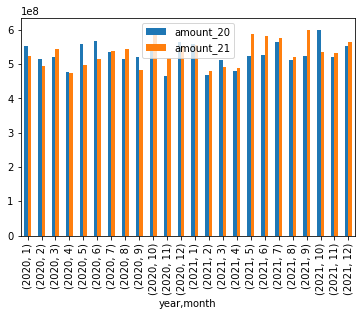

In [27]:
df_ym1.plot(kind='bar')

In [28]:
# 분기별 매출 합계
df_mc=df.groupby(['month_c']).sum()[['amount_20','amount_21']]
df_mc

,amount_20,amount_21
month_c,,
1분기,3.129691e+09,3.092813e+09
2분기,3.135651e+09,3.146419e+09
3분기,3.170517e+09,3.262626e+09
4분기,3.240203e+09,3.306397e+09


<AxesSubplot:xlabel='month_c'>

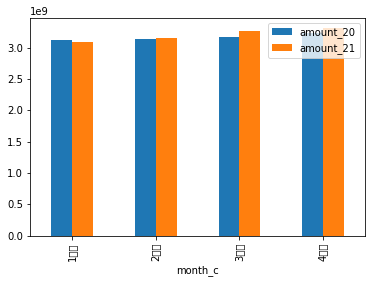

In [29]:
df_mc.plot(kind='bar')

In [37]:
df_time=df.groupby(['time']).sum()[['amount_20','amount_21']]
df_time

,amount_20,amount_21
time,,
1,5.843112e+08,5.133866e+08
2,5.014016e+08,5.501128e+08
3,5.037305e+08,4.991753e+08
4,5.381794e+08,5.516672e+08
5,5.277843e+08,5.062348e+08
6,5.418701e+08,5.106690e+08
7,5.536022e+08,5.531373e+08
8,4.807136e+08,4.668703e+08
9,5.969590e+08,5.782651e+08


<AxesSubplot:xlabel='time'>

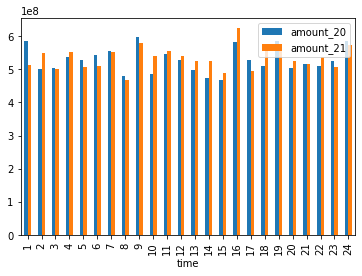

In [38]:
df_time.plot(kind='bar')

In [ ]:
# 고객의 특징에 따라 상승,하강하는 매출 추세 확인

In [30]:
# 성별 매출 합계
df_gender=df.groupby(['gender']).sum()[['amount_20','amount_21']]
df_gender

,amount_20,amount_21
gender,,
female,6.228799e+09,6.432772e+09
male,6.447262e+09,6.375483e+09


<AxesSubplot:xlabel='gender'>

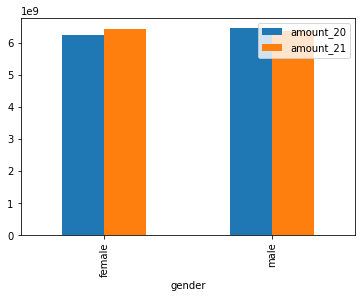

In [31]:
df_gender.plot(kind='bar')

In [32]:
# 연령대별 매출 합계
df_age=df.groupby(['age_c']).sum()[['amount_20','amount_21']]
df_age

,amount_20,amount_21
age_c,,
10대,3.179560e+09,3.147443e+09
20대,1.617987e+09,1.655773e+09
30대,1.597894e+09,1.567298e+09
40대,1.602227e+09,1.644891e+09
50대,1.556241e+09,1.647250e+09
60대,3.122152e+09,3.145601e+09


<AxesSubplot:xlabel='age_c'>

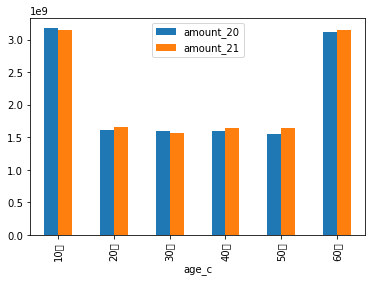

In [33]:
df_age.plot(kind='bar')

In [34]:
# 지역별 매출 합계
df_region=df.groupby(['region']).sum()[['amount_20','amount_21']]
df_region

,amount_20,amount_21
region,,
강원,1.210071e+09,1.264549e+09
경기,1.305931e+09,1.291850e+09
경남,1.243635e+09,1.259134e+09
경북,1.196293e+09,1.267597e+09
부산,1.214857e+09,1.240930e+09
서울,1.327704e+09,1.247795e+09
전남,1.252125e+09,1.260710e+09
전북,1.306672e+09,1.274068e+09
충남,1.321855e+09,1.384629e+09


<AxesSubplot:xlabel='region'>

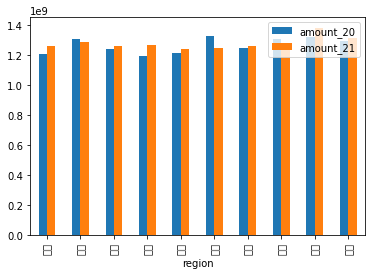

In [35]:
df_region.plot(kind='bar')

In [ ]:
# 연도별 판매 제품 순위 확인 / # 아이템별(고가,중가,저가)

In [114]:
top =df.groupby('product_20').sum()['quantity_20'].sort_values(ascending=False)
top

product_20
저가    172391
고가    168591
중가    167450
Name: quantity_20, dtype: int32

In [115]:
top =df.groupby('product_21').sum()['quantity_21'].sort_values(ascending=False)
top

product_21
고가    170898
저가    167902
중가    162653
Name: quantity_21, dtype: int32

In [60]:
# 중복 cusno 지정
df.cusno = np.random.randint(10001,20001,size=10000)

In [61]:
# 시간대별 고객별 주문량 구하기
#df.groupby(['cusno','time']).count()

In [91]:
order_count_time = df.groupby(['cusno','time']).sum()[['quantity_20','quantity_21']]
order_count_time

quantity_20  quantity_21
cusno time                          
10001 4              29           17
      23             72           23
10003 9              61            2
10005 2               2            6
      13             23           57
...                 ...          ...
19996 17             27            3
19998 16             27           78
19999 8               8           70
20000 4               3           88
      19              9           21

[9792 rows x 2 columns]

In [92]:
order_count_time = order_count_time.reset_index().rename(columns = {'quantity_20':'orders_20','quantity_21':'orders_21'})
order_count_time

,cusno,time,orders_20,orders_21
0,10001,4,29,17
1,10001,23,72,23
2,10003,9,61,2
3,10005,2,2,6
4,10005,13,23,57
...,...,...,...,...
9787,19996,17,27,3
9788,19998,16,27,78
9789,19999,8,8,70
9790,20000,4,3,88


In [93]:
get_max = lambda x:x.loc[x.orders_20.idxmax()]

In [94]:
# 고객별 주문량이 많은 시간 구하기
order_count_time.groupby('cusno').apply(get_max)

,cusno,time,orders_20,orders_21
cusno,,,,
10001,10001,23,72,23
10003,10003,9,61,2
10005,10005,14,27,79
10006,10006,12,34,73
10010,10010,15,46,47
...,...,...,...,...
19995,19995,15,89,100
19996,19996,12,86,94
19998,19998,16,27,78


In [96]:
result = order_count_time.groupby('cusno').apply(get_max).reset_index(drop=True)

In [97]:
# 시간대별 주문량이 많은 고객 구하기
# 고객별로 구매를 많이 하는 시간을 파악해서 개별화된 마케팅 진행 가능하다
result.groupby('time').groups

{1: [19, 29, 49, 67, 113, 143, 146, 148, 158, 182, 215, 218, 298, 315, 330, 420, 428, 449, 453, 484, 493, 555, 558, 581, 614, 633, 650, 702, 715, 735, 763, 777, 785, 793, 830, 866, 882, 924, 1050, 1069, 1111, 1136, 1157, 1182, 1242, 1257, 1262, 1273, 1276, 1281, 1300, 1321, 1340, 1410, 1424, 1435, 1442, 1452, 1507, 1512, 1567, 1575, 1594, 1597, 1605, 1630, 1667, 1683, 1704, 1733, 1739, 1746, 1791, 1810, 1895, 1929, 1943, 1972, 1975, 1996, 2003, 2040, 2085, 2136, 2147, 2149, 2177, 2189, 2256, 2268, 2402, 2461, 2474, 2543, 2547, 2572, 2606, 2612, 2613, 2624, ...], 2: [6, 18, 47, 73, 77, 90, 132, 136, 155, 240, 262, 276, 282, 303, 334, 338, 378, 386, 434, 479, 482, 487, 520, 528, 566, 570, 598, 624, 635, 645, 694, 724, 751, 791, 796, 809, 961, 963, 1054, 1058, 1059, 1078, 1122, 1166, 1236, 1304, 1335, 1338, 1352, 1403, 1439, 1441, 1450, 1462, 1492, 1516, 1526, 1549, 1569, 1610, 1624, 1652, 1657, 1687, 1690, 1701, 1703, 1726, 1735, 1743, 1790, 1803, 1869, 1890, 1926, 1960, 1967, 1970, 1987

In [98]:
# 시간대 지정해서 cusno 확인
result.loc[result.groupby('time').groups[14].values]

,cusno,time,orders_20,orders_21
2,10005,14,27,79
8,10019,14,81,86
39,10078,14,76,10
43,10082,14,27,47
53,10094,14,96,82
...,...,...,...,...
6249,19866,14,68,74
6260,19885,14,62,83
6293,19936,14,9,60
6296,19942,14,61,18


In [ ]:
# 고객 충성도에 따라 고객별 데이터 분석

In [104]:
# 구매 횟수 기준 우수 고객 찾기 top5
df.groupby('cusno').count()
df.groupby('cusno').count()['quantity_20'].sort_values(ascending=False)

cusno
18102    7
10571    7
11143    6
16416    6
19578    6
        ..
16028    1
16029    1
16030    1
16032    1
16591    1
Name: quantity_20, Length: 6339, dtype: int64

In [106]:
# 연도별 구매금액 기준 우수 고객 찾기 top5
df.groupby('cusno').sum()['amount_20'].sort_values(ascending=False)

cusno
19115    12474820.01
10931    12155136.58
15386    12064545.49
10571    11780834.05
13562    11745916.28
            ...     
11732        4204.22
11288        4170.14
12750        3134.65
12756        2921.01
18210        1197.98
Name: amount_20, Length: 6339, dtype: float64

In [107]:
df.groupby('cusno').sum()['amount_21'].sort_values(ascending=False)

cusno
10188    11811394.72
13009    11615005.27
17708    11432786.77
19223    11089012.78
15386    11027589.36
            ...     
18610        3027.88
17470        2849.58
15742        2438.38
13391        2437.43
17186        2131.76
Name: amount_21, Length: 6339, dtype: float64

In [121]:
# 연령대별 
# 연령대별 구매제품 수량 추출
df.groupby(['age_c','product_20']).count()['quantity_20']

age_c  product_20
10대    고가            789
       저가            864
       중가            797
20대    고가            432
       저가            420
       중가            431
30대    고가            393
       저가            408
       중가            445
40대    고가            398
       저가            444
       중가            401
50대    고가            436
       저가            414
       중가            415
60대    고가            865
       저가            840
       중가            808
Name: quantity_20, dtype: int64

In [123]:
df.groupby(['age_c','product_21']).count()['quantity_21']

age_c  product_21
10대    고가            843
       저가            789
       중가            818
20대    고가            409
       저가            452
       중가            422
30대    고가            442
       저가            392
       중가            412
40대    고가            424
       저가            405
       중가            414
50대    고가            445
       저가            418
       중가            402
60대    고가            838
       저가            883
       중가            792
Name: quantity_21, dtype: int64

In [ ]:
# 신규방문,재방문